<a href="https://colab.research.google.com/github/dohyeon-kim012/python-1./blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%20%ED%81%90%EB%A0%88%EC%9D%B4%ED%84%B0%202%EC%B0%A8/%EC%8B%A4%EC%8A%B5_2.%EC%9E%90%EC%A0%84%EA%B1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 목차







# 1) EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/bike_train.csv')

In [ ]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


#### 데이터의 특이점
workingday와 holiday가 둘 다 0인 경우가 존재한다  
이는 평일이면서 동시에 공휴일인 경우이다  
그러나 자전거 대여패턴에 있어 평일이면서 공휴일인 경우와 주말인 경우  
별다른 차이가 있다고 보기 어렵다  
따라서 우리는 두개의 열 중 workingday 열만 분석시 사용했다 

season은 계절이 아닌 분기를 나타낸다  
1월은 겨울임에도 불구하고 봄으로 처리되어 있기 때문에 이 열은 해석에 주의가 필요하다

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


*팀원별 아이디어 정리*

도현: season과 레이블의 관계를 시각화로 확인하고, 특별한 관계가 없으면 drop

제훈: weather와 레이블의 관계를 시각화로 확인

지연: 온도 - 레이블 관계 파악을 위해 상관관계 분석

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## 데이터 설명
[1] nan값은 없으나 windspeed에 데이터가 '0'으로 처리된 값이 많다    
    => 추후 imputer 정의해서 해결

[2] 평균 날씨는 맑은 편이다 (1.4)    
[3] temp보다 atemp가 평균적으로 높다  
[4] 습도는 한국 평균과 비슷하다 (한국 평균=65)  
[5] 풍속은 **0값**이 들어갔음에도 불구하고 평균 12m/s로 한국에 비해 높은 편이다

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
# df = df.set_index(pd.DatetimeIndex(df['datetime']))
# df.drop('datetime', axis=1, inplace=True)

In [ ]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

### Plot 설명
2011년 자전거 평균 대여횟수 : 144.2회  
2012년 자전거 평균 대여횟수 : 238.5회  

월별 추세를 볼 때 여름 > 가을 > 봄 > 겨울 순으로 대여횟수가 많다  
특히 6~10월 사이 자전거 대여량이 많다

시간대별 대여량을 볼 때, 출퇴근 시간에 자전거 대여횟수가 많다 
이는 추후 workingday 유무를 나눠 시각화 해볼 필요가 있어 보인다


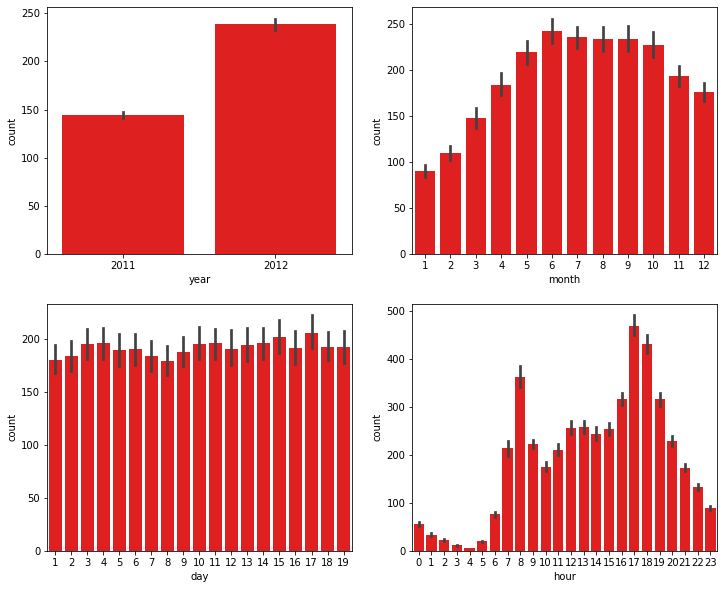

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.barplot(x='year', y='count', data=df, ax=axes[0,0], color='red')
sns.barplot(x='month', y='count', data=df, ax=axes[0,1], color='red')
sns.barplot(x='day', y='count', data=df, ax=axes[1,0], color='red')
sns.barplot(x='hour', y='count', data=df, ax=axes[1,1], color='red')
plt.show()

In [ ]:
df.groupby('year')['count'].mean()

year
2011    144.223349
2012    238.560944
Name: count, dtype: float64

In [ ]:
df.head(7)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,1,6


## 가설 1 (날짜 변수) 

### : 근무일에는 출퇴근 시간대에 자전거 대여횟수가 많지만, 공휴일이나 주말에는 다른 양상을 띨 것이다

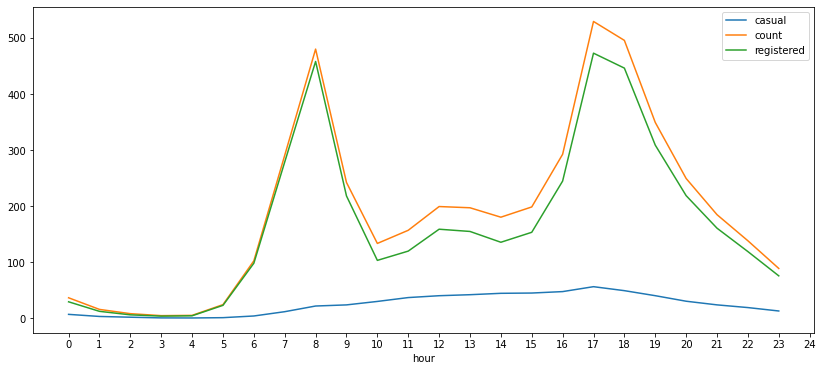

In [ ]:
pivot = pd.pivot_table(
    df.loc[df['workingday'] == 1],
    values=['count', 'casual', 'registered'],
    index=['hour'],
    )
pivot.plot(figsize=(14, 6))
plt.xticks(np.arange(0, 25))
plt.show()

### 설명 1
#### : 평일에는 출퇴근 시간에 자전거 사용량이 주로 많긴하나, 비회원의 경우는 출퇴근 시간에 따른 큰 변화가 없다

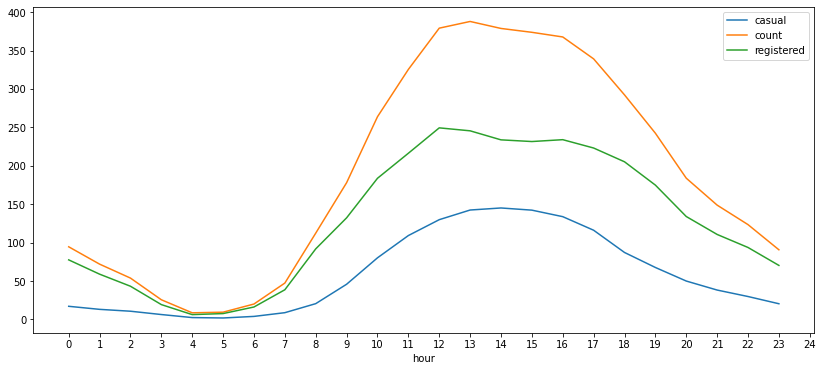

In [ ]:
pivot = pd.pivot_table(
    df.loc[df['workingday'] == 0],
    values=['count', 'casual', 'registered'],
    index=['hour'],
    )
pivot.plot(figsize=(14, 6))
plt.xticks(np.arange(0, 25))
plt.show()

### 설명2
#### : 주말에는 11시부터 오후 6시까지 자전거 사용량이 많으며, 오후 2시 정도에 피크를 찍는다
  
\

### 추후 spearman correlation 분석을 통해 레이블과 순서변수(날짜변수) 간의 상관관계를 파악해봐야 정확히 알 수 있지만, 일단 시각화를 통해 판단한 결과 날짜변수는 자전거 대여횟수와 연관이 있어 보인다

## 가설 2 (온도, 습도, 풍속)
### : 각종 기후 변수들 중 온도를 제외한 변수는 자전거 대여횟수와 큰 상관관계가 없을 것이다

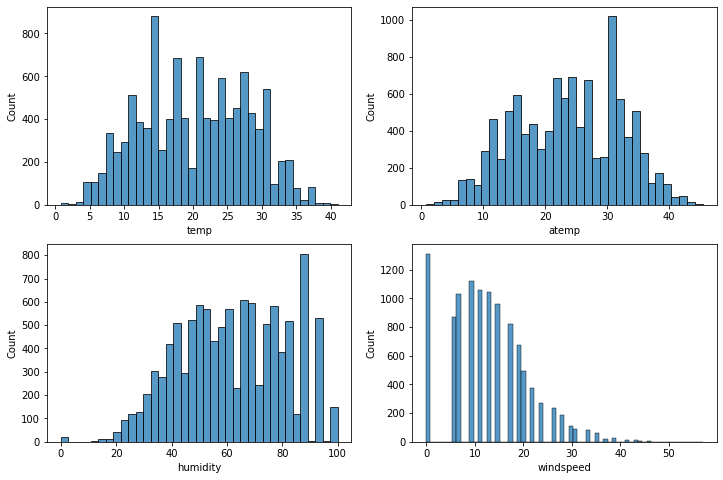

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df['temp'], ax=axes[0,0])
sns.histplot(df['atemp'], ax=axes[0,1])
sns.histplot(df['humidity'], ax=axes[1,0])
sns.histplot(df['windspeed'], ax=axes[1,1])
plt.show()

In [ ]:
df_cor = df[['count', 'temp', 'atemp', 'humidity', 'windspeed']]
df_cor.corr().sort_values(by='count', ascending=False)['count']

count        1.000000
temp         0.394454
atemp        0.389784
windspeed    0.101369
humidity    -0.317371
Name: count, dtype: float64

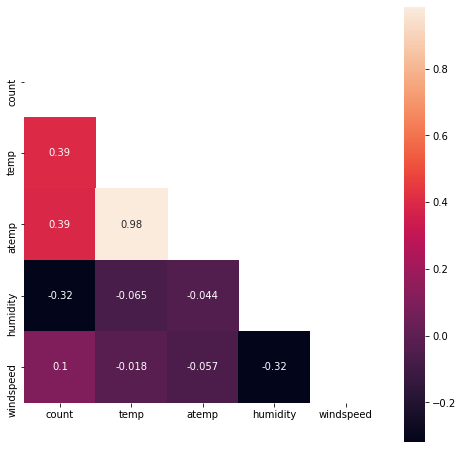

In [ ]:
mask = np.zeros_like(df_cor.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data=df_cor.corr(), mask=mask, annot=True, square=True)
plt.show()

### 다중공선성
#### 기후변수간의 상관관계 분석을 해본 결과, temp와 atemp사이에 다중공선성이 우려되므로 추후 atemp열을 drop하도록 하겠다

## 순서형 자료 상관관계 분석


In [ ]:
# 범주형 변수인 'workingday'은 drop하고 상관관계를 확인

df_corr = df.copy()
df_corr.drop(['holiday', 'casual', 'registered', 'workingday', 'temp', 'atemp',
              'windspeed', 'humidity'], axis=1, inplace=True)

df_corr.corr(method='spearman')['count'].sort_values(ascending=False)
# a = np.c_[bike_final, y_train]
# a = pd.DataFrame(a)
# a = a.rename(columns={14:'yy'})

# a.corr()['yy'].sort_values(ascending=False)

# num1_attr = ['temp', 'atemp', 'humidity', 'hour', 'month']
# num2_attr = 'windspeed' #괄호 쓰면 DF형식이라 오류남
# cat1_attr = ['workingday']
# cat2_attr = ['weather', 'season']

count      1.000000
hour       0.515495
year       0.219596
month      0.180226
season     0.176376
day        0.018694
weather   -0.114133
Name: count, dtype: float64

### 결과 해석  
hour와 year를 제외한 순서형 변수는 count와 상관관계가 미미하다  

다만 weather가 의외로 상관관계가 낮게 나와서, 추가적인 시각화가 필요해 보인다

## Weather 변수 시각화 및 outlier 탐색

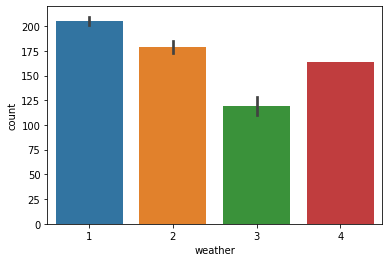

In [ ]:
sns.barplot(x='weather', y='count', data=df)

plt.show()

In [ ]:
df.value_counts('weather')

weather
1    7192
2    2834
3     859
4       1
dtype: int64

### 설명1
시각화 결과 weather '4'의 카운트가 너무 높아 확인을 위해 value_counts를 진행했고,  
4 값이 1개로 outlier로 확인되어 drop하기로 결정

In [ ]:
we4 = df.loc[df['weather'] == 4].index
df.drop(we4, axis=0, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10885 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10885 non-null  datetime64[ns]
 1   season      10885 non-null  int64         
 2   holiday     10885 non-null  int64         
 3   workingday  10885 non-null  int64         
 4   weather     10885 non-null  int64         
 5   temp        10885 non-null  float64       
 6   atemp       10885 non-null  float64       
 7   humidity    10885 non-null  int64         
 8   windspeed   10885 non-null  float64       
 9   casual      10885 non-null  int64         
 10  registered  10885 non-null  int64         
 11  count       10885 non-null  int64         
 12  year        10885 non-null  int64         
 13  month       10885 non-null  int64         
 14  day         10885 non-null  int64         
 15  hour        10885 non-null  int64         
dtypes: datetime64[ns](1), 

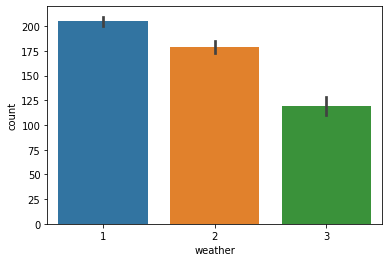

In [ ]:
sns.barplot(x='weather', y='count', data=df)

plt.show()

### 설명2
outlier였던 weather의 '4'값이 사라졌음

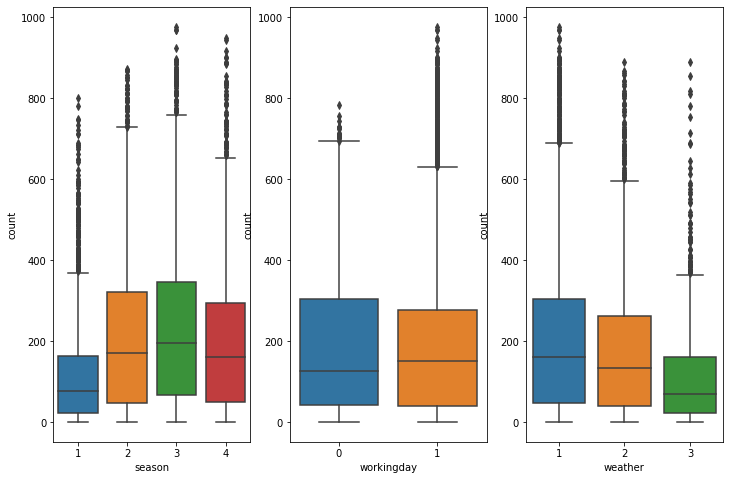

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 8))
sns.boxplot(x='season', y='count', data=df, ax=axes[0])
sns.boxplot(x='workingday', y='count', data=df, ax=axes[1])
sns.boxplot(x='weather', y='count', data=df, ax=axes[2])
plt.show()

### 박스 플롯
계절과 관계 없이 outlier가 많이 분포해 있다  
working day인 경우에 특이값이 더 많이 있다  
weather의 특이값은 위의 plot처럼 분포해 있다

# 2) Data Set Split

### 열 선별 및 drop
사용하지 않을 열을 drop한다

In [ ]:
drop_tmp = ['casual', 'registered', 'holiday', 'datetime', 'atemp']
df_bike = df.drop(drop_tmp, axis=1).copy()

In [ ]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10885 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10885 non-null  int64  
 1   workingday  10885 non-null  int64  
 2   weather     10885 non-null  int64  
 3   temp        10885 non-null  float64
 4   humidity    10885 non-null  int64  
 5   windspeed   10885 non-null  float64
 6   count       10885 non-null  int64  
 7   year        10885 non-null  int64  
 8   month       10885 non-null  int64  
 9   day         10885 non-null  int64  
 10  hour        10885 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 1.3 MB


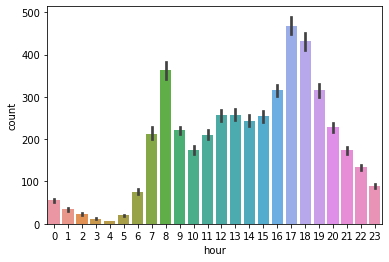

In [ ]:
sns.barplot(x= "hour",
            y= "count",
            data=df_bike )
plt.show()

### pd.cut 및 train_test_split
hour가 레이블과 0.5의 상관관계를 보이므로  
hour feature를 기준으로 train_test_split을 진행하겠다

In [ ]:
from sklearn.model_selection import train_test_split

df_bike['hour_cut'] = pd.cut(
    df_bike['hour'],
    bins=[-0.1, 1, 4, 8, 14, 18, 21, 24, 25],
    labels=[1, 2, 3, 4, 5, 6, 7, 8]
)

X_train, X_valid, y_train, y_valid = train_test_split(
    df_bike.drop('count', axis=1),
    df_bike['count'],
    test_size=0.2,
    shuffle=True,
    stratify=df_bike['hour_cut'],
    random_state=42)
X_train.head(7)

,season,workingday,weather,temp,humidity,windspeed,year,month,day,hour,hour_cut
1603,2,1,3,18.04,77,15.0013,2011,4,12,17,5
4388,4,1,1,20.50,45,12.9980,2011,10,14,21,6
6023,1,1,1,13.12,49,6.0032,2012,2,7,5,3
9881,4,1,1,18.04,67,8.9981,2012,10,16,2,2
2367,2,1,1,31.98,35,0.0000,2011,6,6,13,4
7749,2,0,1,18.86,82,7.0015,2012,6,3,6,3
10023,4,0,1,13.94,53,11.0014,2012,11,3,0,1


# 3) 파이프라인 생성

## Windspeed imputer 생성

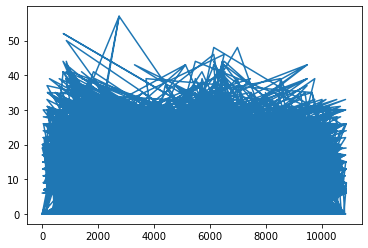

In [ ]:
X_train['windspeed'].plot()
plt.show()

uniform 분포를 활용해서 windspeed의 0값을 처리하겠다

In [ ]:
# X = X_train['windspeed']
# X.loc[X != 0]
# len(X.loc[X == 0])
# np.random.choice(X.loc[X != 0], len(X.loc[X == 0]))
# X.loc[X == 0] = np.random.choice(X.loc[X != 0], len(X.loc[X == 0])).copy()
# X.value_counts()

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# 0이 아닌 풍속들을 idx로 저장하고 풍속이 0인 
class ZerotoUni(BaseEstimator, TransformerMixin):

    def fit(self, X):
        return self
    
    def transform(self, X):
        idx = X.loc[X != 0]
        size = len(X.loc[X == 0])
        X.loc[X == 0] = np.random.choice(idx, size, replace=False)

        return np.array(X).reshape(-1, 1)


# a = ZerotoUni()
# df_bbike = a.transform(df_bike['windspeed'])
# np.unique(df_bbike, return_counts=True)

In [ ]:
# hours = (7,8,9,16,17,18,19)
# class ContributeMixer(BaseEstimator, TransformerMixin):
#     def fit(self, X):
#         return self
    
#     def transform(self, X):
#         X.loc[(X[0] == 1) & (X[1].isin(hours))]
#         return np.array()

In [ ]:
# X = X_train[['workingday', 'hour']].copy()
# X
# hours = (7,8,9,16,17,18,19)
# X['new'] = X.loc[(X['workingday'] == 1) & (X['hour'].isin(hours))]

## 파이프라인 생성 계획  
workingday 열을 ordinal encoder를 사용해 범주형 변수로 바꾼다  

season, weather 열을 OneHot encoder를 사용해 범주형 변수로 바꾼다

In [ ]:
# pd.DataFrame(df_bbike).hist(bins=30, figsize=(12, 6))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

num1_attr = ['temp', 'year', 'humidity', 'hour', 'month']
num2_attr = 'windspeed' #괄호 쓰면 DF형식이라 오류남
cat1_attr = ['workingday']
cat2_attr = ['weather', 'season']

num_pipeline1 = Pipeline([
    ('std_scaler', StandardScaler())
    ])

num_pipeline2 = Pipeline([
    ('zetoU', ZerotoUni()),                     
    ('rob_scaler', StandardScaler())                    
])

cat_pipeline1 = Pipeline([
    ('cat_or', OrdinalEncoder())                     
])

cat_pipeline2 = Pipeline([
    ('cat_oh', OneHotEncoder())                      
])

full_pipeline = ColumnTransformer([
    ('num1', num_pipeline1, num1_attr),
    ('num2', num_pipeline2, num2_attr),
    ('cat1', cat_pipeline1, cat1_attr),
    ('cat2', cat_pipeline2, cat2_attr)                               
])

bike_final = full_pipeline.fit_transform(X_train)
bike_final_val = full_pipeline.fit_transform(X_valid)

In [ ]:
bike_final

array([[-0.28235306, -1.00345106,  0.78709076, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.03286879, -1.00345106, -0.87691466, ...,  0.        ,
         0.        ,  1.        ],
       [-0.91279676,  0.99656081, -0.66891399, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.8734604 ,  0.99656081,  1.67109364, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.55823854, -1.00345106, -0.46091331, ...,  0.        ,
         0.        ,  1.        ],
       [-0.80772281, -1.00345106, -0.46091331, ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
# X_train["windspeed"] # ndarray 형식
# X_train[["windspeed"]] # dataframe 형식 <- 이걸로 파이프라인 넣으면 오류남

In [ ]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, mean_squared_log_error

lin_reg = LinearRegression()
lin_reg.fit(bike_final, y_train)
lin_pred = lin_reg.predict(bike_final_val)
lin_mse = mean_squared_error(y_valid, lin_pred)
# lin_logmse = mean_squared_log_error(np.log1p(y_valid), lin_pred)
lin_rmse = np.sqrt(lin_mse)
# lin_logrmse = np.sqrt(lin_rmse)
lin_rmse
# print(f'lin_rmse :{lin_rmse}, lin_logrmse :{lin_logrmse}') 

143.46223830589918

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'alpha':[0.3, 0.4, 0.5, 0.6, 0.7],
    'l1_ratio':[0.3, 0.5, 0.7]
    }

grid_search = GridSearchCV(
    ElasticNet(),
    params,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True
    )

grid_search.fit(bike_final, y_train)
final_model = grid_search.best_estimator_
final_model

ElasticNet(alpha=0.3, copy_X=True, fit_intercept=True, l1_ratio=0.7,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
final_pred = final_model.predict(bike_final_val)
final_mse = mean_squared_error(y_valid, final_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

143.84481368528407

In [ ]:
my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_valid})
    df = df.sort_values(by='actual').reset_index(drop=True)
    
    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors
    plot_predictions(name_, pred, actual)
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    length = len(df)
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

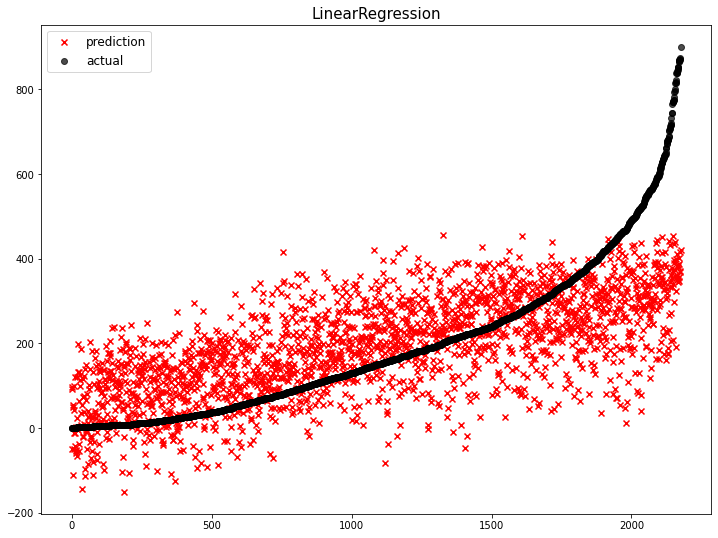

              model          mse
0  LinearRegression  20581.41382


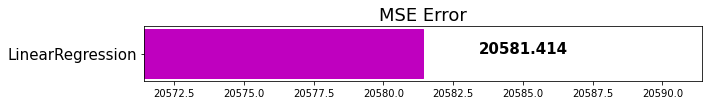

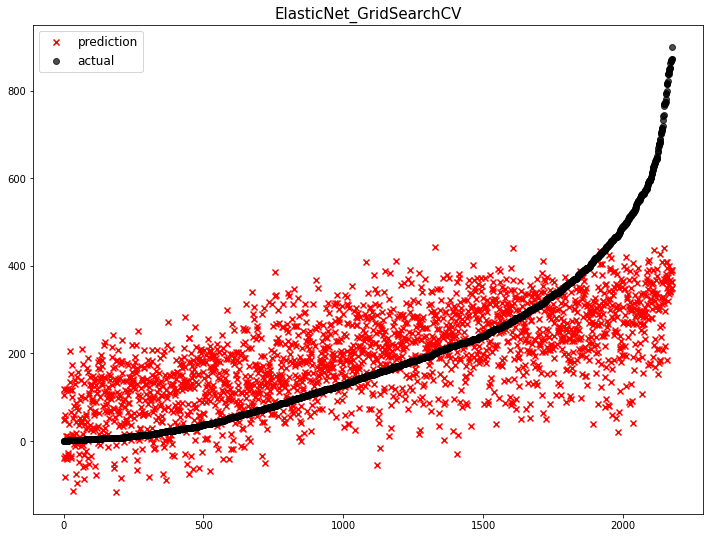

                     model           mse
0  ElasticNet_GridSearchCV  20691.330424
1         LinearRegression  20581.413820


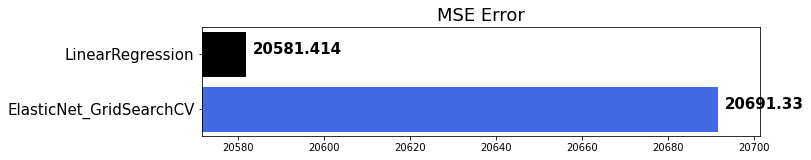

In [ ]:
mse_eval("LinearRegression", lin_pred, y_valid)
mse_eval("ElasticNet_GridSearchCV",  final_pred, y_valid)

# Feedback

1. "보기 어렵다" ->   
근거가 있어야 함, 차라리 단정을 짓는 것이 신뢰성이 높아 보임
2. 코드의 순서를 내용의 흐름에 맞게 정리하기
3. pivot_table을 만들 때 만들어진 DataFrame과 시각화한 결과를 연달아 보여주면 더 이해가 쉬움
4. 상관관계 확인과 별개로 시각화를 통해서도 상관관계에서의 중요성 파악 가능
5. 회귀분석이어도 머신러닝에서의 feature는 일종의 예측 기반 소스이므로, 많은 것이 좋을 수 있음
6. 균등분포보다는 분포 폭이 어느 정도 큰 것이 데이터 분석에 유용함
7. `weather` 의 `4`값은 outlier가 아니라 데이터가 모자란 것이라고 표현하는 것이 더 나음
8. `hour_cut`을 하는 대신 `stratify='hour'`로만 둬도 괜찮음
9. `windspeed`는 groupby로 묶어서 보면 더 좋음
10. `windspeed`는 차라리 RandomForest로 풍속을 예측하는 모델을 만들어서 데이터를 뽑는 게 더 나을 수도 있음
11. 스케일링은 MinMax을 활용하는 것이 좋음
12. 자전거 dataset의 경우 이미 데이터가 잘 분포되어 있으므로 스케일링은 굳이 필요없음

보팅 (Voting) : 투표를 통해 결과를 도출  
배깅 (Bagging) : 샘플 중복 생성을 통해 결과 도출  
부스팅 (Boosting) : 이전 오차를 보완하면서 가중치를 부여  
스태킹 (Stacking) : 여러 모델을 기반으로 예측된 결과를 통해 meta모델이 다시 한 번 예측